In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [3]:
import os
from shutil import copyfile

print(len(os.listdir(f'{os.getcwd()}/dogs-vs-cats/train/train')))


25002


In [4]:
fromDIR = f'{os.getcwd()}/dogs-vs-cats/train/train'
files = [i for i in os.listdir(f'{os.getcwd()}/dogs-vs-cats/train/train')]
for file in files:
    if 'cat.' in file:
        copyfile(os.path.join(fromDIR, file),os.path.join(fromDIR+'/cats/',file))
    elif 'dog.' in file:
        copyfile(os.path.join(fromDIR,file),os.path.join(fromDIR+'/dogs/',file))
print('cats_dir :',len(os.listdir(fromDIR+'/cats')))
print('dogs_dir :', len(os.listdir(fromDIR+'/dogs')))

cats_dir : 12500
dogs_dir : 12500


In [9]:
import random


d_files = [i for i in os.listdir(fromDIR+'/dogs/')]
c_files = [i for i in os.listdir(fromDIR+'/cats/')]
d_files = random.sample(d_files, len(d_files))
c_files = random.sample(c_files, len(c_files))
toDIR_t = f'{os.getcwd()}/dogs-vs-cats/train/training/'
toDIR_v = f'{os.getcwd()}/dogs-vs-cats/train/validation/'
index = int(0.8 * len(os.listdir(fromDIR+'/cats')))
for file in d_files[:index]:
    copyfile(os.path.join(fromDIR+'/dogs/', file),os.path.join(toDIR_t+'dogs/',file))
for file in c_files[:index]:
    copyfile(os.path.join(fromDIR+'/cats/',file),os.path.join(toDIR_t+'cats/',file))
for file in d_files[index:]:
    copyfile(os.path.join(fromDIR+'/dogs/', file),os.path.join(toDIR_v+'dogs/',file))
for file in c_files[index:]:
    copyfile(os.path.join(fromDIR+'/cats/',file),os.path.join(toDIR_v+'cats/',file))
print('cats_dir_t :',len(os.listdir(toDIR_t+'/cats')))
print('dogs_dir_t :', len(os.listdir(toDIR_t+'/dogs')))
print('cats_dir_v :',len(os.listdir(toDIR_v+'/cats')))
print('dogs_dir_V :', len(os.listdir(toDIR_v+'/dogs')))

cats_dir_t : 10000
dogs_dir_t : 10000
cats_dir_v : 2500
dogs_dir_V : 2500


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = toDIR_t
train_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
TRAINING_DIR,batch_size =10,class_mode ='binary', target_size=(150,150)) 

VALIDATION_DIR =  toDIR_v
validation_datagen =ImageDataGenerator(rescale= 1./255) 

validation_generator =validation_datagen.flow_from_directory(
VALIDATION_DIR,batch_size =10,class_mode ='binary', target_size=(150,150)) 



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape =(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [16]:
class Mycallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') >= 0.85:
            self.model.stop_training = True

callbacks = Mycallback()
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                             callbacks=[callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2000 steps, validate for 500 steps
Epoch 1/10
2000/2000 [==============================] - 448s 224ms/step - loss: 0.4805 - acc: 0.7778 - val_loss: 0.5017 - val_acc: 0.7536
Epoch 2/10
2000/2000 [==============================] - 461s 231ms/step - loss: 0.4243 - acc: 0.8119 - val_loss: 0.3797 - val_acc: 0.8352
Epoch 3/10
2000/2000 [==============================] - 419s 209ms/step - loss: 0.3960 - acc: 0.8302 - val_loss: 0.3720 - val_acc: 0.8332
Epoch 4/10
2000/2000 [==============================] - 403s 201ms/step - loss: 0.3725 - acc: 0.8419 - val_loss: 0.3427 - val_acc: 0.8520
Epoch 5/10
2000/2000 [==============================] - 444s 222ms/step - loss: 0.3615 - acc: 0.8512 - val_loss: 0.4681 - val_acc: 0.8246


In [21]:
import pandas as pd
test_dir = 'C:\\Users\\jye12\\GItBig\\tensorflow\\CNN\\dogs-vs-cats\\testing'
test_filenames = os.listdir(test_dir+'/test1')
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
nb_samples


12500

In [35]:

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,class_mode=None,
                                                  batch_size =10, target_size=(150,150),
                                                  shuffle=False) 


Found 12500 images belonging to 1 classes.


In [36]:
predict = model.predict_generator(test_generator, steps=nb_samples/10)

In [42]:
import numpy as np
test_df['category'] = predict

In [46]:
def half(x):
    if x >= .5:
        x = 'dog'
    else:
        x = 'cat'
    return x

In [50]:
# test_df['category'] = test_df['category'].map(half) 
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

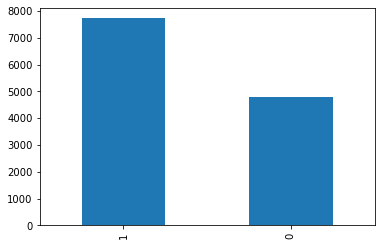

In [51]:
import matplotlib.pyplot as plt
test_df['category'].value_counts().plot.bar()

In [52]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)